# <b>Human Speech Recognition Using Convolutional Neural Network (CNN) </b>
#### Dataset : <a href="https://www.openslr.org/12">librispeech_asr[train-clean-100]</a> and <a href="https://huggingface.co/datasets/librispeech_asr">Details</a>

## TCOP 4020 Co-Op Final Project

<b>Members:</b> 
1. Vivek Patel (101432083) 
2. Prakhar patel (101413720)

### Project GitHub: https://github.com/prakharninja0927/Human-Voice-Recognition-Using-CNN

## Problem Statement

The project addresses persistent challenges in achieving precise and context-aware human speech recognition. By leveraging Convolutional Neural Networks (CNNs), it aims to optimize models for sequential auditory data and enhance adaptability for improved accuracy in transcribing and comprehending diverse speech patterns.

## Contents

| SNo. | Contents | Link |
| -------- | -------- | -------- |
| 1 | <b> Libraries Imports </b> | [Jump To Cell](#lib) |
| 2 | <b> Lets Understand What will be the folder stucture we will require? </b>| [Jump To Cell](#file) |
| 3 | <b> Convert all <u>.flac</u> file to <u>.wav</u> file extension. Geneate CSV file containing Class <u>ID</u> and afiiliated file <u>Path</u> </b>| [Jump To Cell](#CSV) |
| 4 | <b> Defining and Performing Feature Extraction From Audio </b>| [Jump To Cell](#define) |
| 4.1 | Description of Extracted Audio Features | [Jump To Cell](#Features) |
| 5 | <b> Performing Encoding, Splitting Data, Feature Scaling and Adjust Dimensions </b>| [Jump To Cell](#encoding) |
| 6 | <b> Sequential Model Structuring and Training  </b>| [Jump To Cell](#model) |
| 6.1 | <b> Evaluating Model and Observing Performance </b>| [Jump To Cell](#evaluate) |
| 6.1 | <b> Saving Model For Future Usage </b>| [Jump To Cell](#save) |
| 7 | <b> Conclusion </b>| [Jump To Cell](#conclusion) |
| 8 | <b> Learning Outcomes </b> | [Jump To Cell](#learning) |


<a id='lib'></a>

## <b> 1. Libraries Imports </b>


In [1]:
import os
import shutil
import csv

import soundfile as sf

import sys
import pandas as pd
import numpy as np

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
# from tensorflow.keras.utils import np_utils, to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

<a id='file'></a>

## <b> 2. Lets Understand What will be the folder stucture we will require? </b>
- Stucture after unzipping train-clean-100.tar.gz file(<b>Before</b>)
- What we need is to copy or cut <b><u>train-clean-100</u></b> folder inside <b><u>LibriSpeech</u></b> folder and paste to our <b><u>project dir</u></b> with .ipynb file

<div style="display: flex; justify-content: space-between;">
    <pre style="font-size:15px; flex-basis: 50%;">
    <h2>Before</h2>
<b>train-clean-100/</b>
        └── LibriSpeech/
            ├── BOOKS.txt
            ├── CHAPTERS.txt
            ├── LICENSE.txt
            ├── README.txt
            ├── SPEAKERS
            └── train-clean-100/
                ├── 1624(Class ID Folder)/
                │   ├── 168623(Chapter ID)/
                │   │   ├── All Flac files
                │   │   └── One Transcript(.txt)
                │   └── 142933(Chapter ID)/
                │       ├── All Flac files
                │       └── One Transcript(.txt)
                ├── ....
                ├── ....
                └── ....
    </pre>
    <pre style="font-size:15px; flex-basis: 50%;">
    <h2>After</h2>
<b> Project Dir/</b>
        ├── train-clean-100/
        │   ├── 1624(Class ID Folder)/
        │   │   └── 168623(Chapter ID)/
        │   │       ├── All Flac files
        │   │       └── One Transcript(.txt)
        │   ├── ....
        │   ├── ....
        │   └── ....
        └── .ipynb file
    </pre>
</div>

#### Now We have to bring all .flac files which are in sub-sub folders of train-clean-100 in to <b><u>train-clean-100</u><b>


<div style="display: flex; justify-content: space-between;">
    <pre style="font-size:15px; flex-basis: 50%;">
    <h2>Before</h2>
<b> train-clean-100/</b>
         ├── 1624(Class ID Folder)/
         │   ├── 168623(Chapter ID)/
         │   │   ├── All Flac files
         │   │   └── One Transcript(.txt)
         │   └── 142933(Chapter ID)/
         │       ├── All Flac files
         │       └── One Transcript(.txt)
         ├── ....
         ├── ....
         └── ....
    </pre>
    <pre style="font-size:15px; flex-basis: 50%;">
    <h2>After</h2>
<b> train-clean-100/</b>
         └── All .flac files
    </pre>
</div>










### Move all file from sub-sub dir of train-clean-100 to sub dir of train-clean-100 and delete sub-sub dir folders

In [2]:
# Move all file from sub-sub dir of train-clean-100 to sub dir of train-clean-100 and delete sub-sub dir folders
def move_and_delete_subdirectories(root_dir):
    # Iterate over each subdirectory in the root directory
    for sub_dir in os.listdir(root_dir):
        source_path = os.path.join(root_dir, sub_dir)
        
        # Check if the path is a directory
        if os.path.isdir(source_path):
            # Iterate over subdirectories in the current subdirectory
            for sub_sub_dir in os.listdir(source_path):
                sub_sub_dir_path = os.path.join(source_path, sub_sub_dir)
                
                # Check if the sub-subdirectory is a directory
                if os.path.isdir(sub_sub_dir_path):
                    # Move files from sub-subdirectory to the root's first subdirectory
                    for file_name in os.listdir(sub_sub_dir_path):
                        file_path = os.path.join(sub_sub_dir_path, file_name)
                        dest_path = os.path.join(root_dir, sub_dir, file_name)
                        shutil.move(file_path, dest_path)

                    # Remove the sub-subdirectory after moving its contents
                    shutil.rmtree(sub_sub_dir_path)

# Set your root directory
root_dir = 'train-clean-100'

# Call the function to move files from sub-subdirectories to the first subdirectory of the root
# and delete the sub-subdirectories
move_and_delete_subdirectories(root_dir)
print('Process Completed')

Process Completed


### Move all file from sub dir of train-clean-100 to train-clean-100 and delete sub dir train-clean-100

In [3]:
def move_files_and_delete_subdirs(root_directory):
    for subdir, _, files in os.walk(root_directory):
        for file in files:
            src_path = os.path.join(subdir, file)   
            dest_path = os.path.join(root_directory, file)

            # Check if the destination file already exists
            if os.path.exists(dest_path):
                print(f"File {file} already exists in the root directory. Skipping.")
            else:
                # Move the file to the root directory
                shutil.move(src_path, dest_path)

    # Delete subdirectories after moving files
    for subdir in os.listdir(root_directory):
        subdir_path = os.path.join(root_directory, subdir)
        if os.path.isdir(subdir_path):
            shutil.rmtree(subdir_path)
            

# Replace 'your/root/directory' with the actual path to your root directory
root_directory = 'train-clean-100'
move_files_and_delete_subdirs(root_directory)
print('Process Completed')

Process Completed


<a id='CSV'></a>

## <b>3. Convert all <u>.flac</u> file to <u>.wav</u> file extension. Geneate CSV file containing Class <u>ID</u> and afiiliated file <u>Path</u></b>
<a id='CSV'></a>
<br>
Before running below cell create output folder in project dir along with train-clean-100

In [4]:
# Convert .flac file to .wav file
def convert_flac_to_wav(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get a list of all .flac files in the input folder
    flac_files = [f for f in os.listdir(input_folder) if f.endswith('.flac')]

    for flac_file in flac_files:
        flac_path = os.path.join(input_folder, flac_file)
        wav_file = os.path.splitext(flac_file)[0] + '.wav'
        wav_path = os.path.join(output_folder, wav_file)

        try:
            # Read the .flac file and write it as a .wav file
            data, samplerate = sf.read(flac_path)
            sf.write(wav_path, data, samplerate)
                        
        except Exception as e:
            print(f"Error converting {flac_file}: {e}")

if __name__ == "__main__":
    # Specify the input and output folders
    input_folder = "train-clean-100"
    output_folder = "output"

    # Call the function to convert .flac to .wav
    convert_flac_to_wav(input_folder, output_folder)
    print('Conversion Successful')


Conversion Successful


In [5]:
## Export file path and ID in csv format

def extract_info_to_csv(root_directory, csv_filename):
    # Create or open the CSV file for writing
    with open(csv_filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        # Write header to the CSV file
        csv_writer.writerow(['ID', 'Path'])

        # Iterate through files in the root directory
        for filename in os.listdir(root_directory):
            file_path = os.path.join(root_directory, filename)
            
            # Check if it's a file and not a directory
            if os.path.isfile(file_path):
                # Split the filename by hyphen
                parts = filename.split('-', 1)
                
                # Extract the prefix and write to CSV
                if len(parts) == 2:
                    prefix = parts[0]
                    csv_writer.writerow([prefix, file_path])

# Replace 'your/root/directory' with the actual path to your root directory
root_directory = 'output'
csv_filename = 'final.csv'  # Replace with the desired CSV file name

extract_info_to_csv(root_directory, csv_filename)
print('Process Completed')

Process Completed


<a id='define'></a>

## <b>4. Defining and Performing Feature Extraction From Audio </b>

In [6]:
data_path = pd.read_csv('final.csv')

In [7]:
data_path.head()

,ID,Path
0,103,output\103-1240-0000.wav
1,103,output\103-1240-0001.wav
2,103,output\103-1240-0002.wav
3,103,output\103-1240-0003.wav
4,103,output\103-1240-0004.wav


In [8]:
def noise(data):
    # Adds random noise to the input audio data
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    # Time-stretches the input audio data
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    # Shifts the input audio data by a random amount
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate):
    # Changes the pitch of the input audio data
    return librosa.effects.pitch_shift(data, sr = sampling_rate,n_steps=0.7)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

<a id='Features'></a>

### <b>4.1 Description of Extracted Audio Features </b>


The `extract_features` function is designed to extract various audio features from an input audio signal using the librosa library.

##### 1. Zero Crossing Rate (ZCR)
- **Description:** The rate at which the audio signal changes its sign, indicating the presence of rapid changes or transients.
- **Calculation:** Computed as the mean of the zero-crossing rate over time.

##### 2. Chroma Short-Time Fourier Transform (Chroma_stft)
- **Description:** Describes the distribution of energy in the chromatic scale, providing information about the pitch content of the audio.
- **Calculation:** Computed as the mean of the chroma features from the Short-Time Fourier Transform (STFT) of the audio signal.

##### 3. Mel-Frequency Cepstral Coefficients (MFCC)
- **Description:** Represents the spectral characteristics of the audio signal, commonly used in speech and audio analysis.
- **Calculation:** Computed as the mean of the MFCCs over time.

##### 4. Root Mean Square (RMS) Value
- **Description:** Represents the energy of the audio signal by calculating the square root of the mean of the squared values.
- **Calculation:** Computed as the mean of the RMS values over time.

##### 5. Mel Spectrogram
- **Description:** Represents the distribution of energy in the frequency domain, similar to the spectrogram but using a Mel scale.
- **Calculation:** Computed as the mean of the Mel spectrogram values over time.


These features provide valuable information about different aspects of the audio signal, such as pitch, energy, and spectral characteristics, which can be useful for various audio analysis tasks.


In [9]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    try:
        data, sample_rate = librosa.load(path, duration=20, offset=0.6)
    except OSError as exc:
        print(f"Error loading audio file: {exc}")

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [31]:
X, Y = [], []
for path, id in zip(data_path.Path, data_path.ID):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(id)

In [32]:
len(X), len(Y), data_path.Path.shape

(85617, 85617, (28539,))

In [33]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.091818,0.633005,0.595398,0.560430,0.560673,0.515053,0.531644,0.531093,0.568428,0.676183,...,6.801177e-08,6.299121e-08,5.942807e-08,5.677370e-08,5.479472e-08,5.337055e-08,5.233434e-08,5.166278e-08,5.124758e-08,103
1,0.295686,0.729964,0.721353,0.720143,0.726058,0.717354,0.681220,0.617422,0.657781,0.734352,...,5.072138e-03,5.195327e-03,5.211787e-03,5.231399e-03,5.087765e-03,5.106980e-03,5.218174e-03,5.216873e-03,5.212580e-03,103
2,0.129206,0.621794,0.585696,0.553395,0.541997,0.493629,0.508410,0.507531,0.572027,0.686700,...,5.572628e-08,4.889484e-08,4.424225e-08,4.100826e-08,3.852636e-08,3.686300e-08,3.586245e-08,2.870522e-08,1.125214e-08,103
3,0.105365,0.680520,0.586450,0.572095,0.555847,0.575411,0.593454,0.585180,0.636205,0.674506,...,2.339740e-09,2.170901e-09,2.050387e-09,1.960169e-09,1.892689e-09,1.844017e-09,1.808541e-09,1.785531e-09,1.771250e-09,103
4,0.268785,0.767049,0.716642,0.710486,0.715254,0.712134,0.665359,0.642496,0.674546,0.716391,...,3.441353e-03,3.372180e-03,3.447648e-03,3.410452e-03,3.405378e-03,3.416453e-03,3.440375e-03,3.487267e-03,3.452619e-03,103


In [10]:
Features = pd.read_csv('features.csv')

In [11]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

<a id='encoding'></a>

## <b>5. Performing Encoding, Splitting Data, Feature Scaling and Adjust Dimensions </b>
<a id='encoding'></a>

In [12]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [13]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((64212, 162), (64212, 251), (21405, 162), (21405, 251))

In [14]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((64212, 162), (64212, 251), (21405, 162), (21405, 251))

In [15]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((64212, 162, 1), (64212, 251), (21405, 162, 1), (21405, 251))

In [16]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((64212, 162, 1, 1), (64212, 251), (21405, 162, 1, 1), (21405, 251))

<a id='model'></a>

## <b>6. Sequential Model Structuring and Training </b>
<a id='model'></a>

In [17]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=251, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1  (None, 81, 256)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 41, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 21, 128)         

In [44]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)   
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50


1004/1004 [==============================] - 63s 61ms/step - loss: 4.2389 - accuracy: 0.0861 - val_loss: 2.7176 - val_accuracy: 0.3421 - lr: 0.0010
Epoch 2/50
1004/1004 [==============================] - 42s 41ms/step - loss: 3.0882 - accuracy: 0.2157 - val_loss: 2.0583 - val_accuracy: 0.5155 - lr: 0.0010
Epoch 3/50
1004/1004 [==============================] - 69s 69ms/step - loss: 2.8002 - accuracy: 0.2724 - val_loss: 1.8525 - val_accuracy: 0.5503 - lr: 0.0010
Epoch 4/50
1004/1004 [==============================] - 106s 105ms/step - loss: 2.6405 - accuracy: 0.2995 - val_loss: 1.5835 - val_accuracy: 0.6195 - lr: 0.0010
Epoch 5/50
1004/1004 [==============================] - 68s 67ms/step - loss: 2.4909 - accuracy: 0.3310 - val_loss: 1.3838 - val_accuracy: 0.6569 - lr: 0.0010
Epoch 6/50
1004/1004 [==============================] - 89s 88ms/step - loss: 2.2980 - accuracy: 0.3721 - val_loss: 1.2177 - val_accuracy: 0.7224 - lr: 0.0010
Epoch 7/50
1004/1004 [====================

<a id='evaluate'></a>

### <b>6.1  Evaluating Model and Observing Performance </b>


669/669 [==============================] - 5s 8ms/step - loss: 0.3254 - accuracy: 0.9171
Accuracy of our model on test data :  91.70754551887512 %


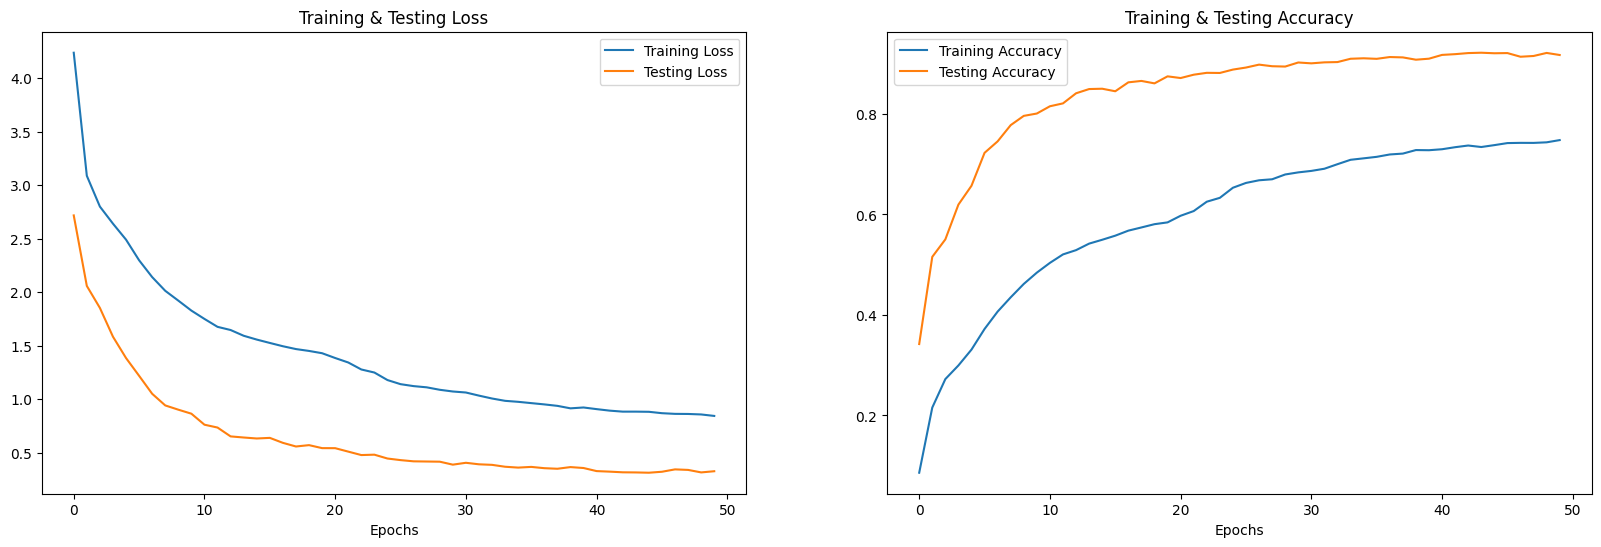

In [45]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [46]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

669/669 [==============================] - 5s 8ms/step


In [47]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,6000,6000
1,3879,3879
2,7059,7059
3,1898,1898
4,2911,2911
5,7113,7113
6,200,200
7,6064,6064
8,5778,5778
9,1841,1841


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          19       1.00      0.98      0.99        93
          26       0.91      0.92      0.91        85
          27       0.89      0.96      0.92        99
          32       0.86      0.94      0.90        84
          39       0.92      0.92      0.92       119
          40       0.99      0.99      0.99        77
          60       0.98      0.96      0.97        83
          78       0.92      0.88      0.90        90
          83       0.89      0.99      0.94        96
          87       1.00      0.98      0.99        81
          89       0.92      0.88      0.90       100
         103       0.97      0.89      0.93        80
         118       0.83      0.70      0.76       111
         125       0.73      0.91      0.81       106
         150       0.95      0.91      0.92        95
         163       0.95      0.93      0.94        81
         196       1.00      0.96      0.98        97
         198       0.88    

<a id='save'></a>

### <b>6.2. Saving Model For Future Usage </b>


In [49]:
model.save('model.keras')

<a id='conclusion'></a>

## <b>7. Conclusion </b>

The presented model is a convolutional neural network (CNN) with a sequential architecture. The architecture comprises multiple layers, including Conv1D (1D convolutional), MaxPooling1D (1D max-pooling), Dropout, Flatten, and Dense layers. The model is designed for a classification task with 251 output classes.

The model has a total of 565,307 parameters, all of which are trainable. The training process was carried out over 50 epochs, using the categorical cross-entropy loss function and the Adam optimizer. The initial training accuracy was around 8.61%, and the validation accuracy improved over the epochs, reaching 79.60% on the validation set.

The classification report shows detailed performance metrics for each class, including precision, recall, and F1-score. The overall accuracy on the test set is 92%.

The model demonstrates good performance across multiple classes, but further analysis and potential fine-tuning can be performed based on specific requirements and goals.


Precision and Recall of Pneumonia class were used.

| SNo. | Model | Parameters | Test Accuracy | Train Accuracy | Validation Accuracy | 
| -------- | -------- | -------- | -------- | -------- | -------- |
| 1 | CNN Sequential |  565,307 | <b>91.70%</b> |  <b> 74.78% </b> |  <b> 91.71% </b> |

<a id="learning"></a>

## <b>8. Learning Out Comes </b>

1. Demonstrated proficiency in **organizing and preprocessing audio data**, encompassing tasks like file format conversion and feature extraction.

2. Implemented effective **data augmentation methods**, including the addition of noise and pitch modification, to enrich the diversity of the training dataset.

3. Enhanced data management through systematic **file organization and cleanup**, consolidating files and eliminating redundant subdirectories.

4. Streamlined dataset documentation by **extracting information and creating a CSV file**, facilitating easy referencing and analysis.

5. Extracted comprehensive audio features, such as **Zero Crossing Rate and Mel Spectrogram**, providing a nuanced representation of the audio data.

6. Applied **one-hot encoding** to transform categorical labels into a format suitable for multiclass classification, enhancing model compatibility.

7. Implemented a well-structured **Convolutional Neural Network (CNN) architecture** using TensorFlow and Keras, showcasing proficiency in model design.

8. Incorporated optimization strategies like the **Adam optimizer and learning rate reduction** during model training for improved efficiency.
9. Evaluated model performance using metrics and visualizations, including **accuracy over epochs**, offering valuable insights into the model's capabilities.
10. Saved the trained CNN model in the **Keras format**, demonstrating proficiency in model preservation for future deployment and reuse.